In [1]:
# import wget
#
# url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# myfile = wget.download(url)

In [2]:
# import tarfile
# file = tarfile.open('food-101.tar.gz')
# file.extractall('./food-101')

In [3]:
# Get labels
import json
import os

from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/train.json")
test_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/test.json")

In [4]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [5]:
import pathlib
import numpy as np
import tensorflow as tf
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    targe_folder = target_dir+target_class
    random_image = random.sample(os.listdir(targe_folder),1)
    img = mpimg.imread(targe_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 442, 3)


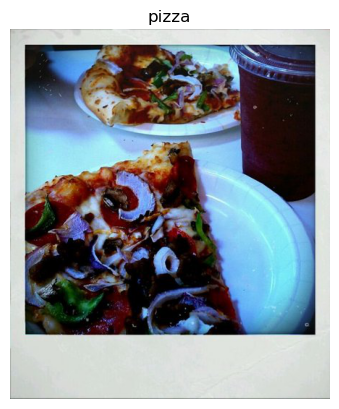

In [7]:
img = view_random_image(target_class="pizza",target_dir="pizza_steak/train/")

In [8]:

tf.constant(img)

<tf.Tensor: shape=(512, 442, 3), dtype=uint8, numpy=
array([[[144, 143, 138],
        [165, 164, 159],
        [176, 177, 171],
        ...,
        [190, 182, 180],
        [191, 181, 180],
        [187, 177, 175]],

       [[155, 154, 149],
        [177, 176, 171],
        [189, 190, 184],
        ...,
        [209, 204, 201],
        [209, 201, 199],
        [205, 197, 194]],

       [[158, 157, 152],
        [180, 179, 174],
        [192, 193, 187],
        ...,
        [217, 213, 210],
        [216, 212, 209],
        [212, 208, 205]],

       ...,

       [[159, 165, 161],
        [182, 188, 184],
        [196, 202, 198],
        ...,
        [203, 208, 204],
        [201, 206, 202],
        [198, 203, 199]],

       [[147, 153, 149],
        [169, 175, 171],
        [181, 187, 183],
        ...,
        [184, 189, 185],
        [184, 189, 185],
        [180, 185, 181]],

       [[100, 106, 102],
        [120, 126, 122],
        [131, 137, 133],
        ...,
        [128, 133, 12

In [9]:
img.shape

(512, 442, 3)

In [10]:
#Normalizing data
img/255.

array([[[0.56470588, 0.56078431, 0.54117647],
        [0.64705882, 0.64313725, 0.62352941],
        [0.69019608, 0.69411765, 0.67058824],
        ...,
        [0.74509804, 0.71372549, 0.70588235],
        [0.74901961, 0.70980392, 0.70588235],
        [0.73333333, 0.69411765, 0.68627451]],

       [[0.60784314, 0.60392157, 0.58431373],
        [0.69411765, 0.69019608, 0.67058824],
        [0.74117647, 0.74509804, 0.72156863],
        ...,
        [0.81960784, 0.8       , 0.78823529],
        [0.81960784, 0.78823529, 0.78039216],
        [0.80392157, 0.77254902, 0.76078431]],

       [[0.61960784, 0.61568627, 0.59607843],
        [0.70588235, 0.70196078, 0.68235294],
        [0.75294118, 0.75686275, 0.73333333],
        ...,
        [0.85098039, 0.83529412, 0.82352941],
        [0.84705882, 0.83137255, 0.81960784],
        [0.83137255, 0.81568627, 0.80392157]],

       ...,

       [[0.62352941, 0.64705882, 0.63137255],
        [0.71372549, 0.7372549 , 0.72156863],
        [0.76862745, 0

In [11]:
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

#setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),])
#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 139ms/step - loss: 0.6241 - accuracy: 0.6667 - val_loss: 0.5209 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5096 - accuracy: 0.7747 - val_loss: 0.4133 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.4831 - accuracy: 0.7840 - val_loss: 0.3996 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.4530 - accuracy: 0.8040 - val_loss: 0.3634 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4038 - accuracy: 0.8233 - val_loss: 0.4044 - val_accuracy: 0.8020


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
#009 Trying a non-CNN model on our image data
#trying to fit image data in non-cnn model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),]
)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 127ms/step - loss: 0.8297 - accuracy: 0.5227 - val_loss: 0.6852 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 6s 124ms/step - loss: 0.6336 - accuracy: 0.6833 - val_loss: 0.6009 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 6s 121ms/step - loss: 0.6075 - accuracy: 0.7260 - val_loss: 0.5952 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5850 - accuracy: 0.7533 - val_loss: 0.5949 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.5744 - accuracy: 0.7480 - val_loss: 0.5720 - val_accuracy: 0.7740


In [15]:
#010 Improving our non-CNN model by adding more layers

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), ]
)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 2.5673 - accuracy: 0.6167 - val_loss: 0.5478 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 0.5802 - accuracy: 0.7460 - val_loss: 0.4431 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.7549 - accuracy: 0.7227 - val_loss: 1.3821 - val_accuracy: 0.6200
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.6914 - accuracy: 0.7347 - val_loss: 0.5673 - val_accuracy: 0.6740
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.5265 - accuracy: 0.7740 - val_loss: 1.2764 - val_accuracy: 0.6560


Image shape: (512, 512, 3)


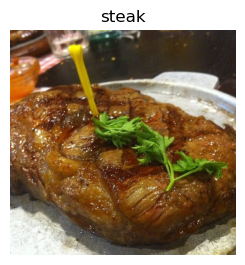

In [16]:
#011 Breaking our CNN model down part 1 Becoming one with the data
# biany classification breakdown
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")



In [17]:
#012 Breaking our CNN model down part 2 Preparing to load our data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [18]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)
#013 Breaking our CNN model down part 3 Loading our data with ImageDataGenerator
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [19]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [20]:
#Get the images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [21]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [22]:
#014 Breaking our CNN model down part 4 Building a baseline CNN model
# create a CNN model (Baseline model)
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from keras import Sequential

# create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [23]:
len(train_data),len(test_data)

(47, 16)

In [24]:
#015 Breaking our CNN model down part 5 Looking inside a Conv2D layer
#016 Breaking our CNN model down part 6 Compiling and fitting our baseline CNN
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 151ms/step - loss: 0.7619 - accuracy: 0.6913 - val_loss: 0.4315 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3654 - accuracy: 0.8440 - val_loss: 0.4494 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.1793 - accuracy: 0.9413 - val_loss: 0.4546 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.0511 - accuracy: 0.9893 - val_loss: 0.4786 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.5940 - val_accuracy: 0.7900


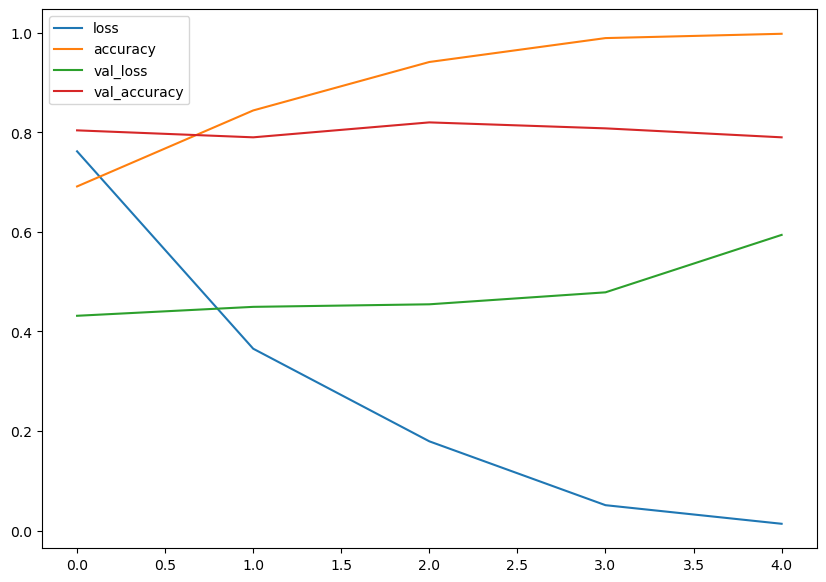

In [26]:
#017 Breaking our CNN model down part 7 Evaluating our CNN's training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [34]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot  accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


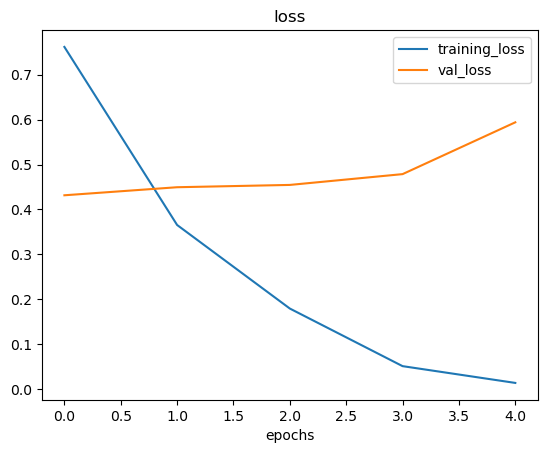

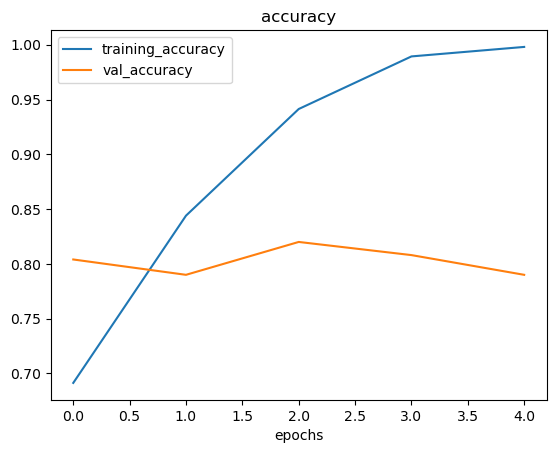

In [35]:
plot_loss_curves(history_4)

In [ ]:
#018 Breaking our CNN model down part 8 Reducing overfitting with Max Pooling